In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
from utils import get_eval_stats, analyze_protein_gen_helper, analyze_protein_gen_helper_violin, plot_line_prot_comp

In [3]:
color_bank = ['#6CA783', '#0C8CE1', '#8C33EB', "#DE9D12", "#C500C5", "#3C99A8"]
protein = '7JJK'

In [4]:
pretrained_file = 'data_full/baseline/pretrained/distribution/original_old_10_0.5_0_results_merge_old_baseline.csv'
df_pre = pd.read_csv(pretrained_file)
pre_stats = get_eval_stats(df_pre, target_protein=protein)

In [5]:
alpha_vals = [round(i * 0.1, 2) for i in range(0, 11)]
model = 'old'
align_types = ['bon', 'beam']
N = 10
data = {}

min_ll = float('inf')
max_ll = -float('inf')
min_ddg = float('inf')
max_ddg = -float('inf')

for align in align_types:
    data[align] = {"ll_vals" : [], "ll_std" : [], "ddg_vals" : [], "ddg_std": []}
    ll_vals = data[align]["ll_vals"]
    ll_std = data[align]["ll_std"]
    ddg_vals = data[align]["ddg_vals"]
    ddg_std = data[align]["ddg_std"]
    for alpha in alpha_vals: 
        name = f"{align}-{align}"
        fn = f"data_full/comp_balanced/sequence_{model}_{protein}_{align}_balanced_{10}_1_{alpha}.csv"
        df = pd.read_csv(fn)
        stat = get_eval_stats(df, target_protein=protein)
        ll_vals.append(stat['ll'])
        ll_std.append(stat['ll_std'])
        ddg_vals.append(stat['ddg'])
        ddg_std.append(stat['ddg_std'])
        min_ll = min(min_ll, min(ll_vals))
        max_ll = max(max_ll, max(ll_vals))
        min_ddg = min(min_ddg, min(ddg_vals))
        max_ddg = max(max_ddg, max(ddg_vals))

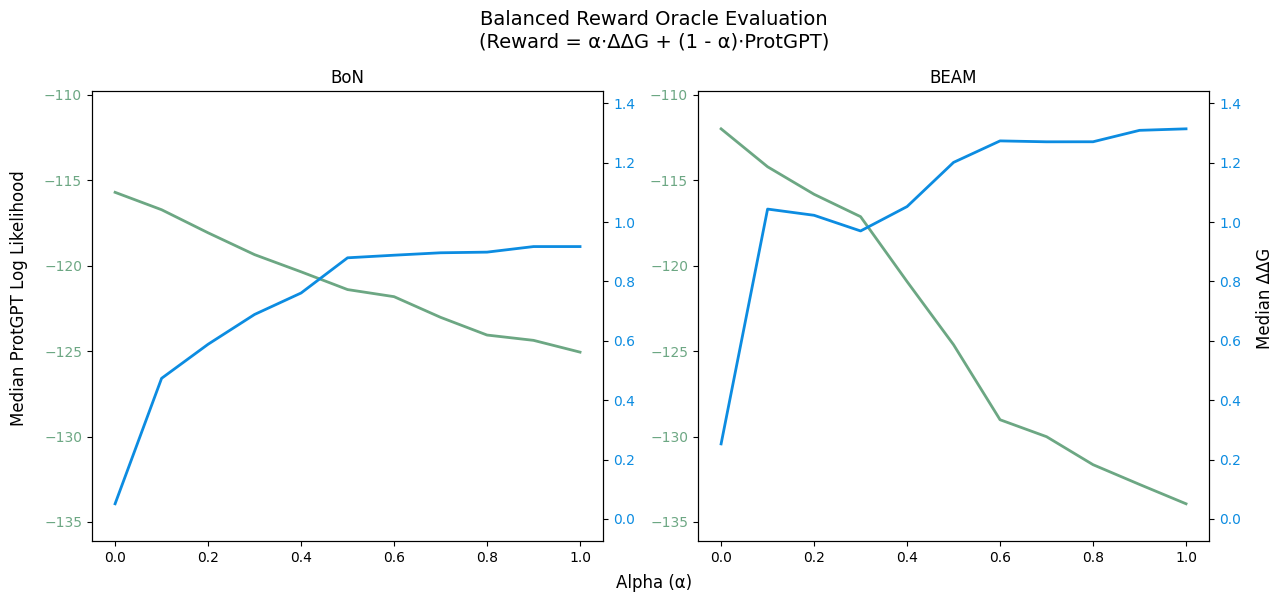

In [7]:
import matplotlib.pyplot as plt

colors = {
    "ll": '#6CA783',   # Green for log-likelihood
    "ddg": '#0C8CE1',  # Blue for ΔΔG
}
align_labels = {"bon": "BoN", "beam": "BEAM"}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

ll_range = max_ll - min_ll
ddg_range = max_ddg - min_ddg
buffer_size = 0.1
ax_min_ll = min_ll - ll_range * buffer_size
ax_max_ll = max_ll + ll_range * buffer_size
ax_min_ddg = min_ddg - ddg_range * buffer_size
ax_max_ddg = max_ddg + ddg_range * buffer_size

for ax, align in zip([ax1, ax2], align_types):
    ll_vals = data[align]["ll_vals"]
    ddg_vals = data[align]["ddg_vals"]

    ax.plot(alpha_vals, ll_vals, color=colors["ll"], label="Log Likelihood", linewidth=2)
    ax.tick_params(axis='y', labelcolor=colors["ll"])
    ax.set_ylim(ax_min_ll, ax_max_ll)

    ax_twin = ax.twinx()
    ax_twin.plot(alpha_vals, ddg_vals, color=colors["ddg"], label="ΔΔG", linewidth=2)
    ax_twin.tick_params(axis='y', labelcolor=colors["ddg"])
    ax_twin.set_ylim(ax_min_ddg, ax_max_ddg)

    ax.set_title(f"{align_labels[align]}")

# Shared axis labels
fig.supxlabel("Alpha (α)", fontsize=12)
fig.supylabel("Median ProtGPT Log Likelihood", fontsize=12, color="black", x=0.04)
fig.text(0.93, 0.5, "Median ΔΔG", va='center', rotation='vertical', fontsize=12, color="black")

# Main title and layout
fig.suptitle('Balanced Reward Oracle Evaluation\n(Reward = α⋅ΔΔG + (1 - α)⋅ProtGPT)', fontsize=14)
fig.tight_layout(rect=[0.03, -0.025, 0.93, 1])
plt.show()
